In [7]:
import xarray as xr 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import dask.array as da
from dask import delayed, compute
from dask.diagnostics import ProgressBar
import os
from helper import concatenate_images2
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
from skimage.measure import label
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import ListedColormap
import json
import cmocean


In [3]:
ds_raw_bt = xr.open_dataset('/projekt_agmwend/home_rad/Joshua/HALO-AC3_VELOX_sea_ice/2022-03-20_v_0.1.zarr', engine='zarr')
ds_raw_sel = ds_raw_bt.sel(time=slice('2022-03-20T10:51:30', '2022-03-20T10:53:30')).load()

ds_snow_covered = ds_raw_sel.mean(dim='time').compute()


ds_raw_bt = xr.open_dataset('/projekt_agmwend/home_rad/Joshua/HALO-AC3_VELOX_sea_ice/2022-03-16_v_0.1.zarr', engine='zarr')
ds_raw_sel = ds_raw_bt.sel(time=slice('2022-03-16T09:25:00', '2022-03-16T09:33:00')).load()

ds_open_ocean = ds_raw_sel.mean(dim='time').compute()


ds_raw_bt = xr.open_dataset('/projekt_agmwend/home_rad/Joshua/HALO-AC3_VELOX_sea_ice/2022-04-11_v_0.1.zarr', engine='zarr')
ds_raw_sel = ds_raw_bt.sel(time=slice('2022-04-11T10:55:00', '2022-04-11T11:05:00')).load()

ds_cold_cloud = ds_raw_sel.mean(dim='time').compute()

ds_raw_bt = xr.open_dataset('/projekt_agmwend/home_rad/Joshua/HALO-AC3_VELOX_sea_ice/2022-04-01_v_0.1.zarr', engine='zarr')
ds_raw_sel = ds_raw_bt.sel(time=slice('2022-04-01T10:08:48', '2022-04-01T10:11:00')).load()

ds_cloud_street = ds_raw_sel.mean(dim='time').compute()

ds_raw_bt = xr.open_dataset('/projekt_agmwend/home_rad/Joshua/HALO-AC3_VELOX_sea_ice/2022-04-01_v_0.1.zarr', engine='zarr')
ds_raw_sel = ds_raw_bt.sel(time=slice('2022-04-01T12:34:40', '2022-04-01T12:42:00')).load()

ds_miz = ds_raw_sel.mean(dim='time').compute()

ds_raw_bt = xr.open_dataset('/projekt_agmwend/home_rad/Joshua/HALO-AC3_VELOX_sea_ice/2022-04-01_v_0.1.zarr', engine='zarr')
ds_raw_sel = ds_raw_bt.sel(time=slice('2022-04-01T15:10:40', '2022-04-01T15:25:00')).load()

ds_low_homog_cloud = ds_raw_sel.mean(dim='time').compute()


ds_raw_bt = xr.open_dataset('/projekt_agmwend/home_rad/Joshua/HALO-AC3_VELOX_sea_ice/2022-03-28_v_0.1.zarr', engine='zarr')
ds_raw_sel = ds_raw_bt.sel(time=slice('2022-03-28T10:31:30', '2022-03-28T10:33:00')).load()

ds_snow_floe = ds_raw_sel.mean(dim='time').compute()

In [4]:
list_of_mean = []
list_of_std = []

for ds in [ds_miz, ds_open_ocean, ds_cloud_street, ds_cold_cloud, ds_low_homog_cloud, ds_snow_covered, ds_snow_floe]:

    ds_sel = ds.sel(y=slice(242, 252)).BT_2D.mean(dim='y')
    mean = ds_sel.mean(dim='x').compute() + 273.15
    std = ds_sel.std(dim='x').compute() 

    list_of_mean.append(mean)
    list_of_std.append(std)

means = xr.concat(list_of_mean, dim='scene')
stds = xr.concat(list_of_std, dim='scene')

ds = xr.Dataset({'mean': means, 'std': stds})

ds = ds.assign_coords(scene=['miz', 'open_ocean' ,'cloud_street', 'cold_cloud', 'low_cloud', 'snow_covered', 'snow_floe'])

NameError: name 'ds_miz' is not defined

In [5]:
ds.scene
ds['cat_scene'] = ['open_ocean', 'cloud_type', 'miz_type', 'cloud_type', 'cloud_type', 'snow_covered_ice', 'snow_covered_ice']


NameError: name 'ds' is not defined

In [3]:
#fig, ax = plt.subplots()
from cmocean import cm 

ds.scene
ds['cat_scene'] = ['open_ocean', 'cloud_type', 'miz_type', 'cloud_type', 'cloud_type', 'snow_covered_ice', 'snow_covered_ice']


#plt.prop_cycle = plt.cycler('color', [color_dict[scene] for scene in ds.cat_scene.values])


im = ds.plot.scatter(x='mean', y='std', col='band', levels=[0, 1, 2, 3, 4, 5], 
                     cmap=cmocean.cm.ice, s=100, linewidth=1, edgecolor='black',
                     add_colorbar=True, col_wrap=1, hue='scene', figsize=(16, 9), add_legend=False, zorder=100)


from scipy.stats import linregress

fig =  plt.gcf()
axs = fig.get_axes()

## adjust spacing between subplots

plt.subplots_adjust(hspace=0.5, wspace=0.5)


plt.rcParams.update({'font.size': 16, 'axes.labelsize': 16, 'legend.fontsize': 16, 'xtick.labelsize': 16, 'ytick.labelsize': 16, 'axes.titlesize': 16})

colors = plt.cm.viridis(np.linspace(0, 1, 5))

channels = ['Ch1 (7.7-12µm)', 'Ch2 (8.3µm)', 'Ch3 (10.8µm)', 'Ch5 (11.8µm)', 'Ch6 (12µm)']


ds_stds_disk = xr.open_dataset('../../data/correction_angle_temperature_dependence_stds_v1.nc')
ds_means_disk = xr.open_dataset('../../data/correction_angle_temperature_dependence_means_v1.nc')

x = ds_means_disk.BT_2D + 273.15
y = ds_stds_disk.BT_2D

ds_final = xr.Dataset(
    data_vars=dict(
        BT_2D = x,
        BT_2D_std = y
    )
)



for i in range(5):

    ### make 2d histogram

    x = ds_means_disk.BT_2D.isel(band=i) + 273.15
    y = ds_stds_disk.BT_2D.isel(band=i)
    mask = np.isnan(x) | np.isnan(y)
    x = x[~mask]
    y = y[~mask]

    axs[i].scatter(x, y, color='gray', s=15, alpha=0.7, edgecolor='black', linewidth=0.1, zorder=1)


for band in range(5):

    x = ds.sel(band=band)['mean'].values
    y = ds.sel(band=band)['std'].values

    mask = np.isnan(x) | np.isnan(y)
    x[mask] = 270
    y[mask] = 1
    #y = y[~mask]

    divider = make_axes_locatable(axs[band])
    cax = divider.append_axes('right', size='60%', pad=0.05)

    slope, intercept, r_value, p_value, std_err = linregress(x, y)


    x_new = np.linspace(-60, 10, len(x)) + 273.15
    y_new = slope * x_new + intercept

    from sklearn.metrics import mean_squared_error

    RMSE_linear = mean_squared_error(y, y_new, squared=False)
    RMSE_linear = np.mean(y)


    axs[band].plot(x_new, y_new, color='red', lw=2.5, label='Linear Fit', alpha=0.5, ls='--')
    ylabel  = '$\delta T_\mathrm{B,}$'

    if band > 2: 
        ylabel1 = f'$_{band+2}$'
    else:
        ylabel1 = f'$_{band+1}$'


    axs[band].set_ylabel(ylabel+f'{ylabel1} (K)')

    #ax[i].plot(x, second_order(x, *popt), color='blue', lw=1.5)


    text = f'$\delta T_B${ylabel1}$=A\cdot T_B${ylabel1}$+B$\n$A={slope:.3f}\,$K⁻¹\n$B={intercept:.3f}\,$K\n$R^2={r_value**2:.3f}$\nmean$(\delta T_B${ylabel1}$)={RMSE_linear:.3f}\,$K'

    cax.text(
        0.1, 1, text, 
        verticalalignment='top', horizontalalignment='left',
        transform=cax.transAxes,
        color='black', fontsize=14)
    cax.axis('off')

    axs[band].spines[['top', 'right']].set_visible(False)
    axs[band].set_xlabel('')


    axs[band].text(0.75, 0.85, channels[band], transform=axs[band].transAxes, fontsize=14,
            verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))

    axs[band].set_title('')

axs[4].set_xlabel('$T_B$ (K)')


cbar = im.cbar

cbar.ax.set_position([0.95, 0.15, 0.05, 0.7])


plt.savefig('../../plots/angular_unceratinty_scatter_plot_v3.png', dpi=300, bbox_inches='tight')


<>:87: SyntaxWarning: invalid escape sequence '\d'
<>:100: SyntaxWarning: invalid escape sequence '\d'
<>:100: SyntaxWarning: invalid escape sequence '\c'
<>:100: SyntaxWarning: invalid escape sequence '\,'
<>:100: SyntaxWarning: invalid escape sequence '\,'
<>:100: SyntaxWarning: invalid escape sequence '\d'
<>:100: SyntaxWarning: invalid escape sequence '\,'
<>:87: SyntaxWarning: invalid escape sequence '\d'
<>:100: SyntaxWarning: invalid escape sequence '\d'
<>:100: SyntaxWarning: invalid escape sequence '\c'
<>:100: SyntaxWarning: invalid escape sequence '\,'
<>:100: SyntaxWarning: invalid escape sequence '\,'
<>:100: SyntaxWarning: invalid escape sequence '\d'
<>:100: SyntaxWarning: invalid escape sequence '\,'
/tmp/ipykernel_2645057/4285863804.py:87: SyntaxWarning: invalid escape sequence '\d'
  ylabel  = '$\delta T_\mathrm{B,}$'
/tmp/ipykernel_2645057/4285863804.py:100: SyntaxWarning: invalid escape sequence '\d'
  text = f'$\delta T_B${ylabel1}$=A\cdot T_B${ylabel1}$+B$\n$A={sl

NameError: name 'ds' is not defined

<>:55: SyntaxWarning: invalid escape sequence '\d'
<>:89: SyntaxWarning: invalid escape sequence '\m'
<>:90: SyntaxWarning: invalid escape sequence '\d'
<>:99: SyntaxWarning: invalid escape sequence '\m'
<>:101: SyntaxWarning: invalid escape sequence '\m'
<>:55: SyntaxWarning: invalid escape sequence '\d'
<>:89: SyntaxWarning: invalid escape sequence '\m'
<>:90: SyntaxWarning: invalid escape sequence '\d'
<>:99: SyntaxWarning: invalid escape sequence '\m'
<>:101: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipykernel_2645057/306366599.py:55: SyntaxWarning: invalid escape sequence '\d'
  print(f'Total uncertainty $\delta T_S$ surface skin temperature retrieval (SCA): {delta_T_S_sca_avg:.2f} K')
/tmp/ipykernel_2645057/306366599.py:89: SyntaxWarning: invalid escape sequence '\m'
  ax.set_xlabel('$T_\mathrm{B,5}$ (K)')
/tmp/ipykernel_2645057/306366599.py:90: SyntaxWarning: invalid escape sequence '\d'
  ax.set_ylabel('$\delta T_\mathrm{S}$ (K)')
/tmp/ipykernel_2645057/306366599.py:99: 

Camera error for T_B,5 = 230K: 1.65 K
Camera error for T_B,5 = 270K: 0.41 K
Camera error for T_B,6 = 230K: 1.26 K
Camera error for T_B,6 = 270K: 0.42 K
Total uncertainty $\delta T_S$ surface skin temperature retrieval (SCA): 0.29 K


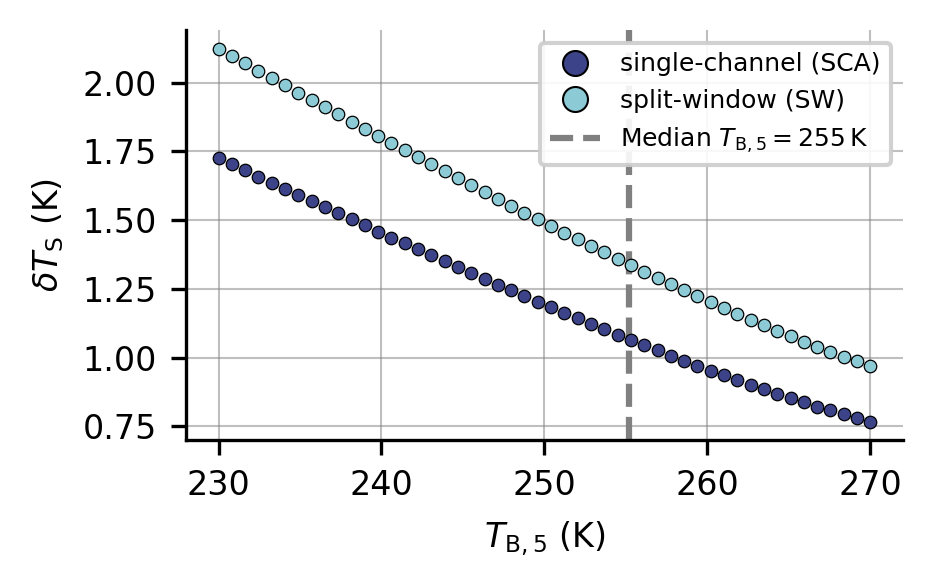

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import cmocean

ds_stds_disk = xr.open_dataset('../../data/correction_angle_temperature_dependence_stds_v1.nc')
ds_means_disk = xr.open_dataset('../../data/correction_angle_temperature_dependence_means_v1.nc')


# Constants
a_scs = 9.051  # K
b_scs = 0.967  # K^-1
e_atm_sca = 0.47  # K

b_sw = 0.95
a_sw = 11
c_sw = 2.09

NETD_B5 = 0.473  # K
NETD_B6 = 0.473  # K

a_b5 = 8.781  # K
b_b5 = -0.031  # K^-1

b_b6 = -0.022
a_b6 = 6.370

import json
plt.rcParams.update(json.load(open('/projekt_agmwend/home_rad/Joshua/MasterArbeit/plot_settings.json')))
### make the scaling of the plot true in vscode

# Range of measured brightness temperatures (T_B,5)
T_B5 = np.linspace(230, 270, 50)  # from 230K to 270K
T_B6 = T_B5 * 0.947 + 14.584 ### from the fit performed later hihi

# Calculate the internal camera error for each T_B,5
delta_T_camera_5 = a_b5 + b_b5 * T_B5
delta_T_camera_6 = a_b6 + b_b6 * T_B6

print(f'Camera error for T_B,5 = 230K: {delta_T_camera_5[0]:.2f} K')
print(f'Camera error for T_B,5 = 270K: {delta_T_camera_5[-1]:.2f} K')

print(f'Camera error for T_B,6 = 230K: {delta_T_camera_6[0]:.2f} K')
print(f'Camera error for T_B,6 = 270K: {delta_T_camera_6[-1]:.2f} K')

# Calculate the uncertainty in T_B,5
delta_T_B5 = np.sqrt((NETD_B5)**2 + delta_T_camera_5**2)
delta_T_B6 = np.sqrt((NETD_B6)**2 + delta_T_camera_6**2)

# Calculate the total uncertainty for the single-channel algorithm (SCA)
delta_T_S_sca = np.sqrt(e_atm_sca**2 + (b_scs * delta_T_B5)**2)
delta_T_S_sw = np.sqrt(e_atm_sca**2 + (b_sw * delta_T_B5)**2 + (b_sw * delta_T_B6)**2)

delta_T_S_sca_avg = np.std(delta_T_S_sca)
#delta_T_S_sca_avg = np.sqrt(NETD_B5**2 * b_scs**2 + e_atm_sca**2 + 0.93**2)
print(f'Total uncertainty $\delta T_S$ surface skin temperature retrieval (SCA): {delta_T_S_sca_avg:.2f} K')



# import seaborn as sns  
# sns.set_style("whitegrid")

settings = json.load(open('../plot_settings.json'))
plt.rcParams.update(settings)



plt.rcParams.update(
    {
        'font.size': 8,
        'axes.labelsize': 8,
        'legend.fontsize': 6,
        'xtick.labelsize': 8,
        'ytick.labelsize': 8,
        'axes.titlesize': 8,
    }
)

fig, ax = plt.subplots(figsize=(3.15, 2))

# Plotting

colors = cmocean.cm.ice

c1 = colors(.3)
c2 = colors(.8)

ax.scatter(T_B5, delta_T_S_sca, color=cmocean.cm.ice(.3), s=9, edgecolors='black', linewidth=0.3, label='single-channel (SCA)', zorder=2)
ax.scatter(T_B5, delta_T_S_sw, color=cmocean.cm.ice(.8), s=9, edgecolors='black', linewidth=0.3, label='split-window (SW)', zorder=2)
ax.set_xlabel('$T_\mathrm{B,5}$ (K)')
ax.set_ylabel('$\delta T_\mathrm{S}$ (K)')

handles = [plt.Line2D([0], [0], marker='o', color='w', label='single-channel (SCA)', markerfacecolor=c1, markersize=6, markeredgecolor='k', markeredgewidth=.5),
           plt.Line2D([0], [0], marker='o', color='w', label='split-window (SW)', markerfacecolor=c2, markersize=6, markeredgecolor='k', markeredgewidth=.5)]

#ax.legend(handles=handles, loc='upper left', frameon=True, fancybox=True, shadow=False, framealpha=0.9)

# Add median line
median_tb5 = np.median(ds_means_disk.BT_2D.isel(band=3).values + 273.15)
ax.axvline(median_tb5, color='gray', lw=1.5, ls='--', label='Median $T_\mathrm{B,5}=255\,$K', zorder=0)

handles += [plt.Line2D([0], [0], color='gray', lw=1.5, ls='--', label='Median $T_\mathrm{B,5}=255\,$K')]

# Add legend
ax.legend(handles=handles, loc='upper right', frameon=True, fancybox=True, shadow=False, framealpha=0.9)
#ax.axes.grid(False, )
ax.axes.grid(True, which='major', color='gray', linewidth=0.5, alpha=0.5, zorder=1)
ax.spines[['top', 'right']].set_visible(False)
# Adjust layout



plt.tight_layout()



# Save the plot

plt.savefig('../../plots/angular_uncertainty_total_uncertainty_response_to_low_signal_v2.png', dpi=300, bbox_inches='tight')

In [30]:
#ds_final.BT_2D.isel(band=3).plot.hist(bins=100, alpha=0.5, color='blue', label='BT_2D')
#ds_final.BT_2D.isel(band=3).median()

delta_T_camera_5 = a_b5 + b_b5 * ds_final.BT_2D.isel(band=3).median()
print(f'Camera error for T_B,5={ds_final.BT_2D.isel(band=3).median() :.2f} K: {delta_T_camera_5:.2f} K')
delta_T_camera_6 = a_b6 + b_b6 * ds_final.BT_2D.isel(band=4).median()
print(f'Camera error for T_B,6={ds_final.BT_2D.isel(band=4).median() :.2f} K: {delta_T_camera_6:.2f} K')



Camera error for T_B,5=255.18 K: 0.87 K
Camera error for T_B,6=256.67 K: 0.72 K


In [31]:
255 - 273.15

-18.149999999999977

<>:64: SyntaxWarning: invalid escape sequence '\d'
<>:77: SyntaxWarning: invalid escape sequence '\d'
<>:77: SyntaxWarning: invalid escape sequence '\,'
<>:77: SyntaxWarning: invalid escape sequence '\,'
<>:91: SyntaxWarning: invalid escape sequence '\m'
<>:64: SyntaxWarning: invalid escape sequence '\d'
<>:77: SyntaxWarning: invalid escape sequence '\d'
<>:77: SyntaxWarning: invalid escape sequence '\,'
<>:77: SyntaxWarning: invalid escape sequence '\,'
<>:91: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipykernel_2637353/3100408408.py:64: SyntaxWarning: invalid escape sequence '\d'
  ylabel  = '$\delta T_\mathrm{B}$'
/tmp/ipykernel_2637353/3100408408.py:77: SyntaxWarning: invalid escape sequence '\d'
  text = f'$\delta T_B=A\cdot T_B+B$\n    $A={slope:.3f}\,$K⁻¹\n    $B={intercept:.3f}\,$K\n  $R^2={r_value**2:.3f}$\n $RMSE={RMSE_linear:.3f}$'
/tmp/ipykernel_2637353/3100408408.py:77: SyntaxWarning: invalid escape sequence '\,'
  text = f'$\delta T_B=A\cdot T_B+B$\n    $A={slope:.3

Text(0.5, 0, '$T_\\mathrm{B}$')

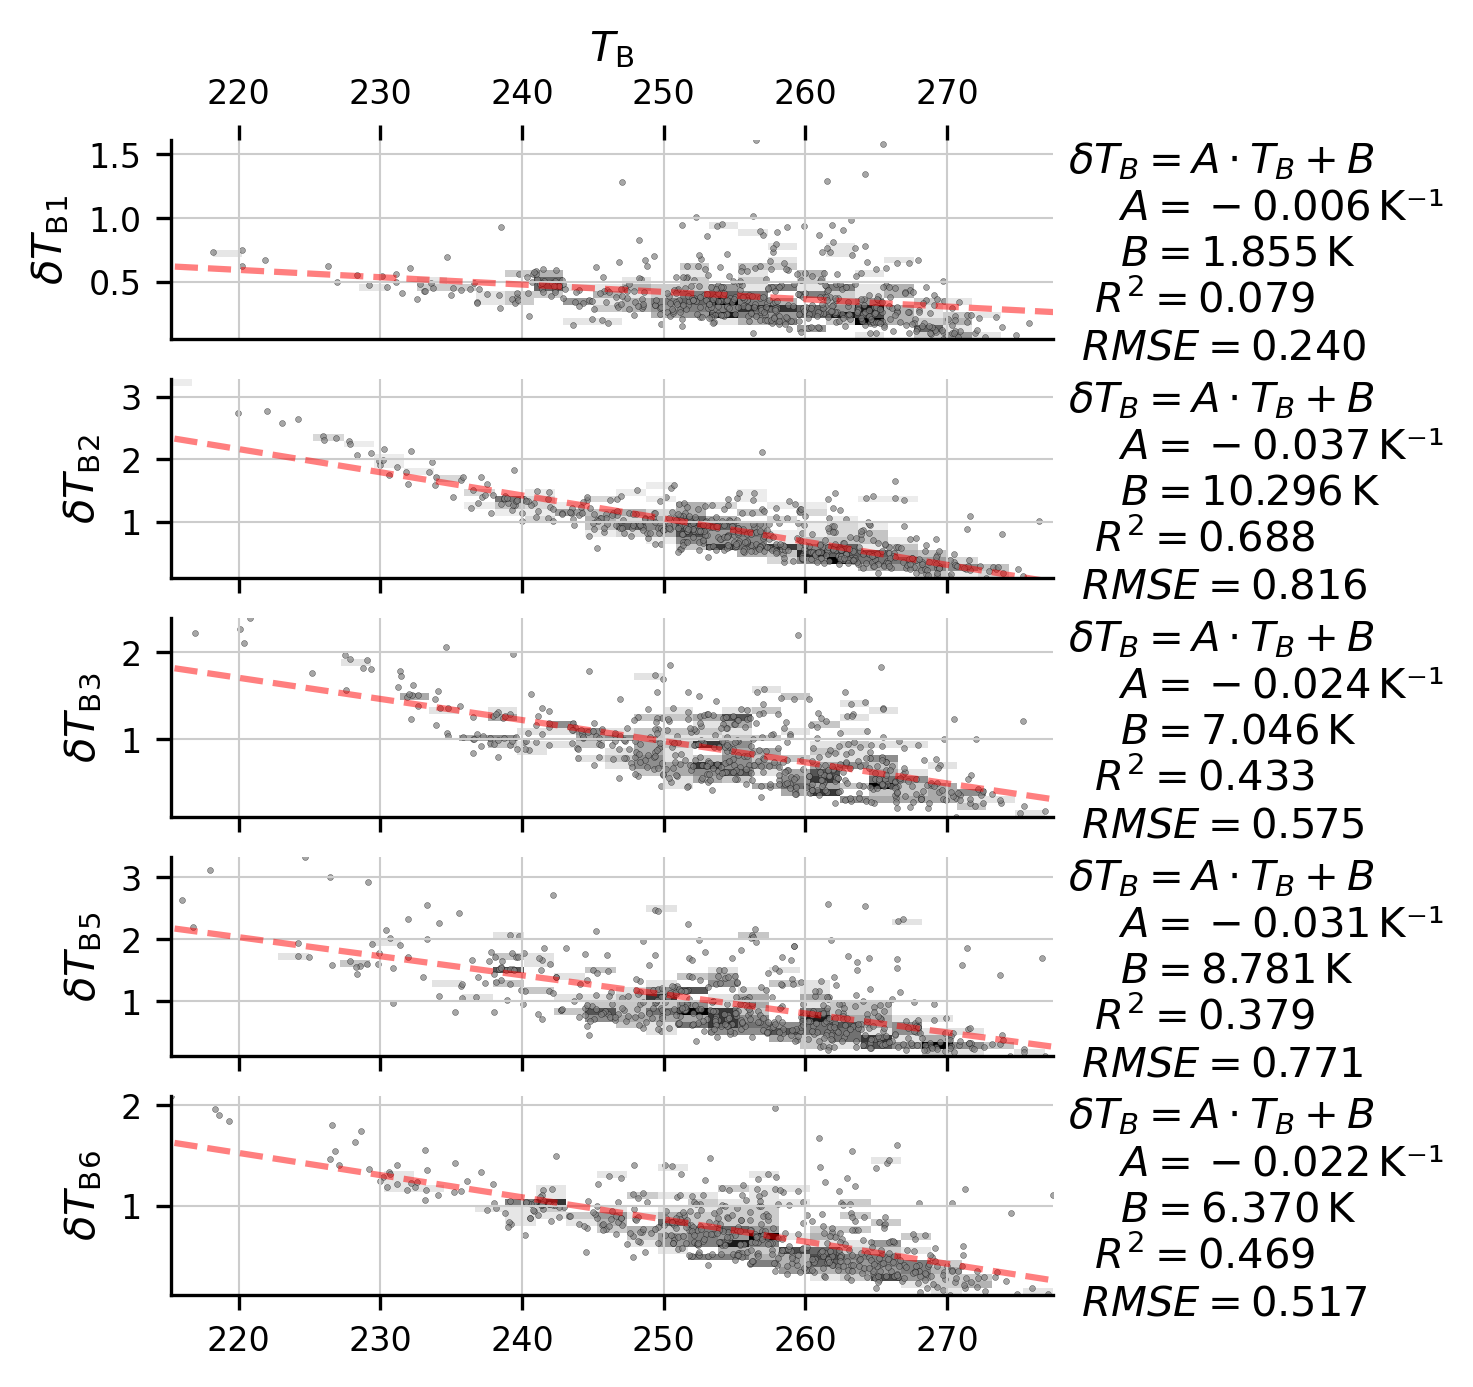

In [9]:
ds_stds_disk = xr.open_dataset('../../data/correction_angle_temperature_dependence_stds_v1.nc')
ds_means_disk = xr.open_dataset('../../data/correction_angle_temperature_dependence_means_v1.nc')

x = ds_means_disk.BT_2D + 273.15
y = ds_stds_disk.BT_2D

ds_final = xr.Dataset(
    data_vars=dict(
        BT_2D = x,
        BT_2D_std = y
    )
)
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress
from scipy.optimize import curve_fit

def second_order(x, a, b, c):
    return a + b * 1 / (1 + np.exp(c * x)) 

from mpl_toolkits.axes_grid1 import make_axes_locatable



fig, ax = plt.subplots(5, 1, figsize=(5, 5), sharex=True)

for i in range(5):

    ### make 2d histogram

    x = ds_means_disk.BT_2D.isel(band=i) + 273.15
    y = ds_stds_disk.BT_2D.isel(band=i)
    mask = np.isnan(x) | np.isnan(y)
    x = x[~mask]
    y = y[~mask]

    bins = [np.linspace(x.min(), x.max(), 30), np.linspace(y.min(), y.max(), 30)]

    ax[i].hist2d(x, y, bins=bins, cmap='gray_r', cmin=1)

    ax[i].set_xlabel('Mean T_B')
    ax[i].set_ylabel('Std T_B')

    ax[i].scatter(x, y, color='gray', s=2, alpha=0.7, edgecolor='black', linewidth=0.1)


    popt, pcov = curve_fit(second_order, x, y)

    divider = make_axes_locatable(ax[i])
    cax = divider.append_axes('right', size='30%', pad=0.05)

    slope, intercept, r_value, p_value, std_err = linregress(x, y)


    x_new = np.linspace(-60, 10, len(x)) + 273.15
    y_new = slope * x_new + intercept

    from sklearn.metrics import mean_squared_error

    RMSE_linear = mean_squared_error(y, y_new, squared=False)


    ax[i].plot(x_new, y_new, color='red', lw=1.5, label='Linear Fit', alpha=0.5, ls='--')
    ylabel  = '$\delta T_\mathrm{B}$'

    if i > 2: 
        ylabel += f'$_{i+2}$'
    else:
        ylabel += f'$_{i+1}$'


    ax[i].set_ylabel(ylabel)

    #ax[i].plot(x, second_order(x, *popt), color='blue', lw=1.5)


    text = f'$\delta T_B=A\cdot T_B+B$\n    $A={slope:.3f}\,$K⁻¹\n    $B={intercept:.3f}\,$K\n  $R^2={r_value**2:.3f}$\n $RMSE={RMSE_linear:.3f}$'

    cax.text(
        0, 1, text, 
        verticalalignment='top', horizontalalignment='left',
        transform=cax.transAxes,
        color='black', fontsize=10)
    cax.axis('off')

    ax[i].spines[['top', 'right']].set_visible(False)
    ax[i].set_xlabel('')

ax[0].xaxis.set_tick_params(labeltop=True, labelbottom=False, top=True, bottom=False)
ax[0].xaxis.set_label_position('top')
ax[0].set_xlabel('$T_\mathrm{B}$')


Text(0.15, 0.95, 'std=a*std+b\na=0.947 K⁻¹\nb=14.583 K\nR²=0.994')

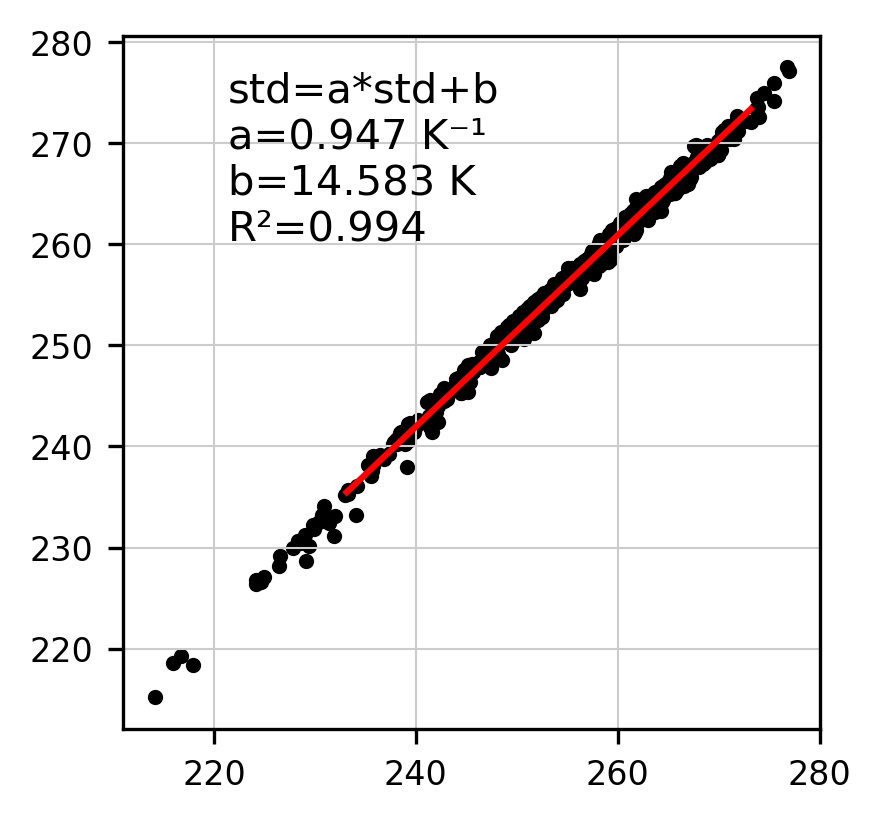

In [10]:
x1 = ds_final.BT_2D.isel(band=3)
x2 = ds_final.BT_2D.isel(band=4)

plt.figure(figsize=(3, 3))
plt.scatter(x1, x2, c='black', s=10, edgecolors='black', linewidth=0.5)

slope, intercept, r_value, p_value, std_err = linregress(x1, x2)    

x = np.linspace(-40, 0, 100) + 273.15
y = slope * x + intercept

plt.plot(x, y, color='red', lw=1.5)

plt.text(
    0.15, 0.95, f'std=a*std+b\na={slope:.3f} K⁻¹\nb={intercept:.3f} K\nR²={r_value**2:.3f}', 
    verticalalignment='top', horizontalalignment='left',
    transform=plt.gca().transAxes,
    color='black', fontsize=10)

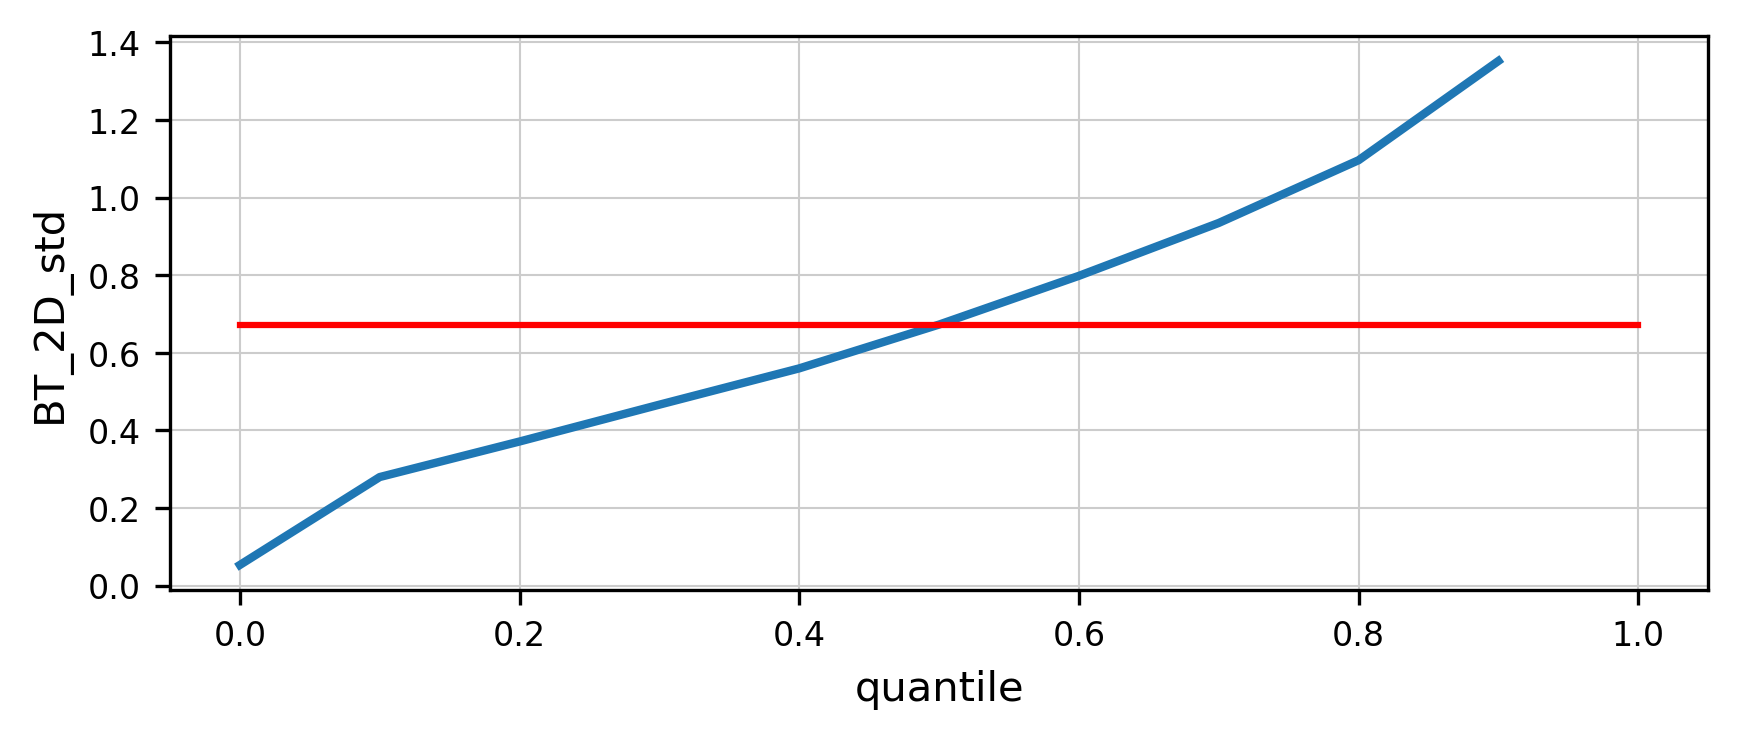

In [11]:
ds_final.BT_2D_std.quantile(np.arange(0, 1, 0.1)).plot()
## add the median to the plot

plt.plot([0, 1], [ds_final.BT_2D_std.median(), ds_final.BT_2D_std.median()], color='red', lw=1.5)